In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Subplots - subplot()

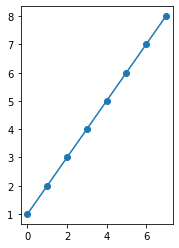

In [2]:
# Vamos a crear una nueva figura
plt.figure()

# y crear una subplots con 1 fila, 2 columnas y el eje actual es el primer eje de la subparcela
plt.subplot(1, 2, 1)

# Vamos a crear algunos datos
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

De acuerdo, genial, tenemos una trama delgada en el lado izquierdo. Si hiciéramos una segunda llamada a subplot(), podríamos indicar que también queremos trazar en el lado derecho.

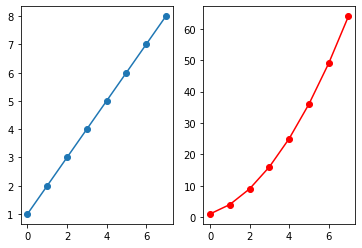

In [4]:
# Primer grafico
plt.subplot(1, 2, 1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

# Segundo grafico - subplot()
plt.subplot(1,2,2)
exponential_data = linear_data**2
plt.plot(exponential_data, '-o', color="r")

### Ajustar los ejes de los subplots

Cuando crea un subploy, puede compartir el eje x, y o ambos utilizando los parámetros **share x and share y**.

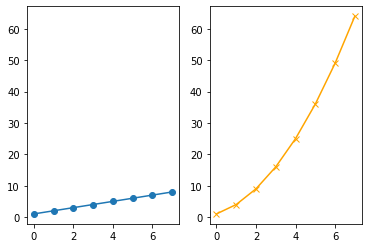

In [12]:
# Tracemos la primera figura y obtengamos una referencia a esos ejes
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# ahora vamos a decirle a la siguiente trama que queremos compartir los ejes y con el
# uno de ax1 para asegurar que las dos subparcelas comparten el mismo eje y
ax2 = plt.subplot(122, sharey=ax1)
plt.plot(exponential_data, '-x', color = 'orange')

### Varios graficos con la funcion "subplots"

Hay una buena función llamada subtramas, **tenga en cuenta el plural**, que le permite obtener muchos objetos de eje a la vez, y creo que esto es genial. Entonces, si quisiéramos obtener una cuadrícula de tres por tres con todos los rangos de los ejes x e y bloqueados, podemos hacerlo así.

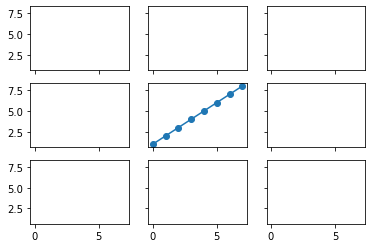

In [14]:
# Crear una grilla de graficos de 3x3
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# graficar los datos_lineales en los ejes de la quinta subparcela
ax5.plot(linear_data, '-o')


La sintaxis parece un poco tonta tal vez porque estamos desempaquetando los resultados de la función de subparcelas directamente, pero es una forma efectiva de construir una cuadrícula donde todo comparte un eje. Sin embargo, los resultados se ven muy bien, pero tenga en cuenta que **este método desactiva las etiquetas y y x, excepto en los gráficos que se encuentran en el lado izquierdo o en la parte inferior de la figura**.

Para solucionar esto, podemos **iterar con un bucle FOR** y no tenemos que almacenar una referencia a cada eje

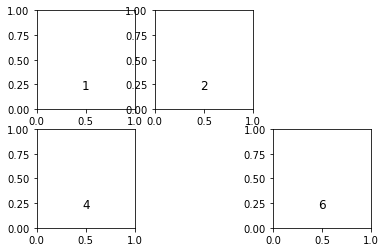

In [17]:
# Vamos a crear una figura
# Ahora iteremos sobre 6 puntos potenciales en nuestra figura. Voy a crear un diagrama con 2 filas y 3 columnas.
# no tracemos algo si estamos en la posición 5 o 3, los dejaremos como agujeros solo para ver qué sucede

# Ahora agreguemos una subtrama, especificamos los dos primeros argumentos como la estructura que esperamos
# figura a tomar, por lo que 2 filas y 3 columnas, y el tercer argumento es la posición de este elemento en el
# figura, en este caso i.
# Mientras iteramos linealmente, esto se asigna a nuestro espacio de fila/columna de 2x3, por lo que el
# numeración va de izquierda a derecha y de arriba a abajo
    
# Y agregaremos un poco de texto a las figuras para que quede más claro qué artículo fue a dónde.
# Recuerde de la lección sobre anotación que el texto va en la esquina inferior izquierda por defecto,
# y estamos usando posicionamiento relativo

fig = plt.gcf()
for i in range(1 ,7):
    if i != 5 and i != 3:
        ax = fig.add_subplot(2, 3, i)
        ax.text(0.5, 0.2, str((i)),fontsize=12, ha='center')

## Ejemplo de subplots con un data frame real

In [21]:
iris = pd.read_csv('iris.csv')

In [22]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


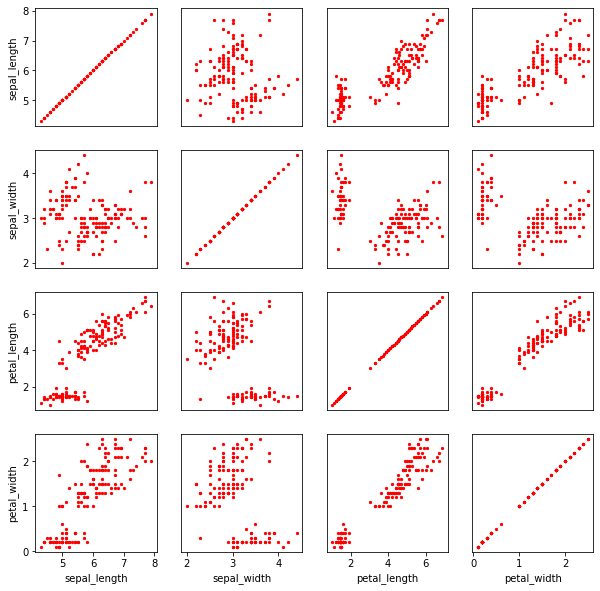

In [26]:
# Let's first capture a list of the variables we are interested in
import pandas as pd
df=pd.read_csv('iris.csv')
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Now we need to create a grid of subplots of size width and height equal to the number of different variables (4 in this case)
# we want to explore, in this case that's a 4x4 grid
# We´ll use the len cols to make the subplots
fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))

# Now we want to iterate across each column in our dataframe and compare it to each other column in our
# DataFrame. We'll do this with a couple of nested for loops
for i in range(len(cols)):
    for j in range(len(cols)):
        # Now we just want to plot a scatter plot comparing the columns i and j. Sometimes this will be the
        # same column, so we would expect to see a diagnol line trend. I'm going to set the marker size to 5
        # just to make things a bit more clear
        axs[i,j].scatter(df[cols[j]], df[cols[i]], s=5, color = "red")

        # Also, we've seen that when we plot multiple Axes things get cluttered with Axis tickmarks and
        # labels, so let's turn those off
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

        # Then we'll turn them back on only if we are the last row...
        if i == len(cols) - 1:
            axs[i,j].get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(cols[j])
            
        # ...and similarly, only show the y-axis labels for the first column.
        if j == 0:
            axs[i,j].get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(cols[i])

# Now let's take a look at our data!